In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
#import dataset
df = pd.read_csv(filepath_or_buffer="/Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/coin.csv")

In [3]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [4]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]
df_train.head()

date
2014-12-01    366.775068
2014-12-02    375.943001
2014-12-03    377.882701
2014-12-04    377.991743
2014-12-06    378.000000
Name: Weighted_Price, dtype: float64

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01


In [6]:
#data preprocess
training=df_train.values
training=np.reshape(training,(len(training),1))
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training=sc.fit_transform(training)
x_train=training[0:len(training)-1]
y_train=training[1:len(training)]
x_train=np.reshape(x_train,(len(x_train),1,1))

In [13]:
#import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow
import np_utils

ImportError: cannot import name np_utils

In [23]:
regressor=Sequential()
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,batch_size=5,epochs=100)


Epoch 1/100
1148/1148 [==============================] - 1s 1ms/step - loss: 0.0410
Epoch 2/100
1148/1148 [==============================] - 1s 511us/step - loss: 0.0253
Epoch 3/100
1148/1148 [==============================] - 1s 513us/step - loss: 0.0228
Epoch 4/100
1148/1148 [==============================] - 1s 496us/step - loss: 0.0203
Epoch 5/100
1148/1148 [==============================] - 1s 469us/step - loss: 0.0176
Epoch 6/100
1148/1148 [==============================] - 1s 477us/step - loss: 0.0150
Epoch 7/100
1148/1148 [==============================] - 1s 496us/step - loss: 0.0124
Epoch 8/100
1148/1148 [==============================] - 1s 490us/step - loss: 0.0099
Epoch 9/100
1148/1148 [==============================] - 1s 452us/step - loss: 0.0076
Epoch 10/100
1148/1148 [==============================] - 1s 483us/step - loss: 0.0055
Epoch 11/100
1148/1148 [==============================] - 1s 458us/step - loss: 0.0037
Epoch 12/100
1148/1148 [==============================

In [ ]:
#prediction
test=df_test.values
inputs=np.reshape(test,(len(test),1))
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(len(inputs),1,1))
predicted_BTC_Price=regressor.predict(inputs)
predicted_BTC_Price=sc.inverse_transform(predicted_BTC_Price)


AttributeError: Unknown property lable

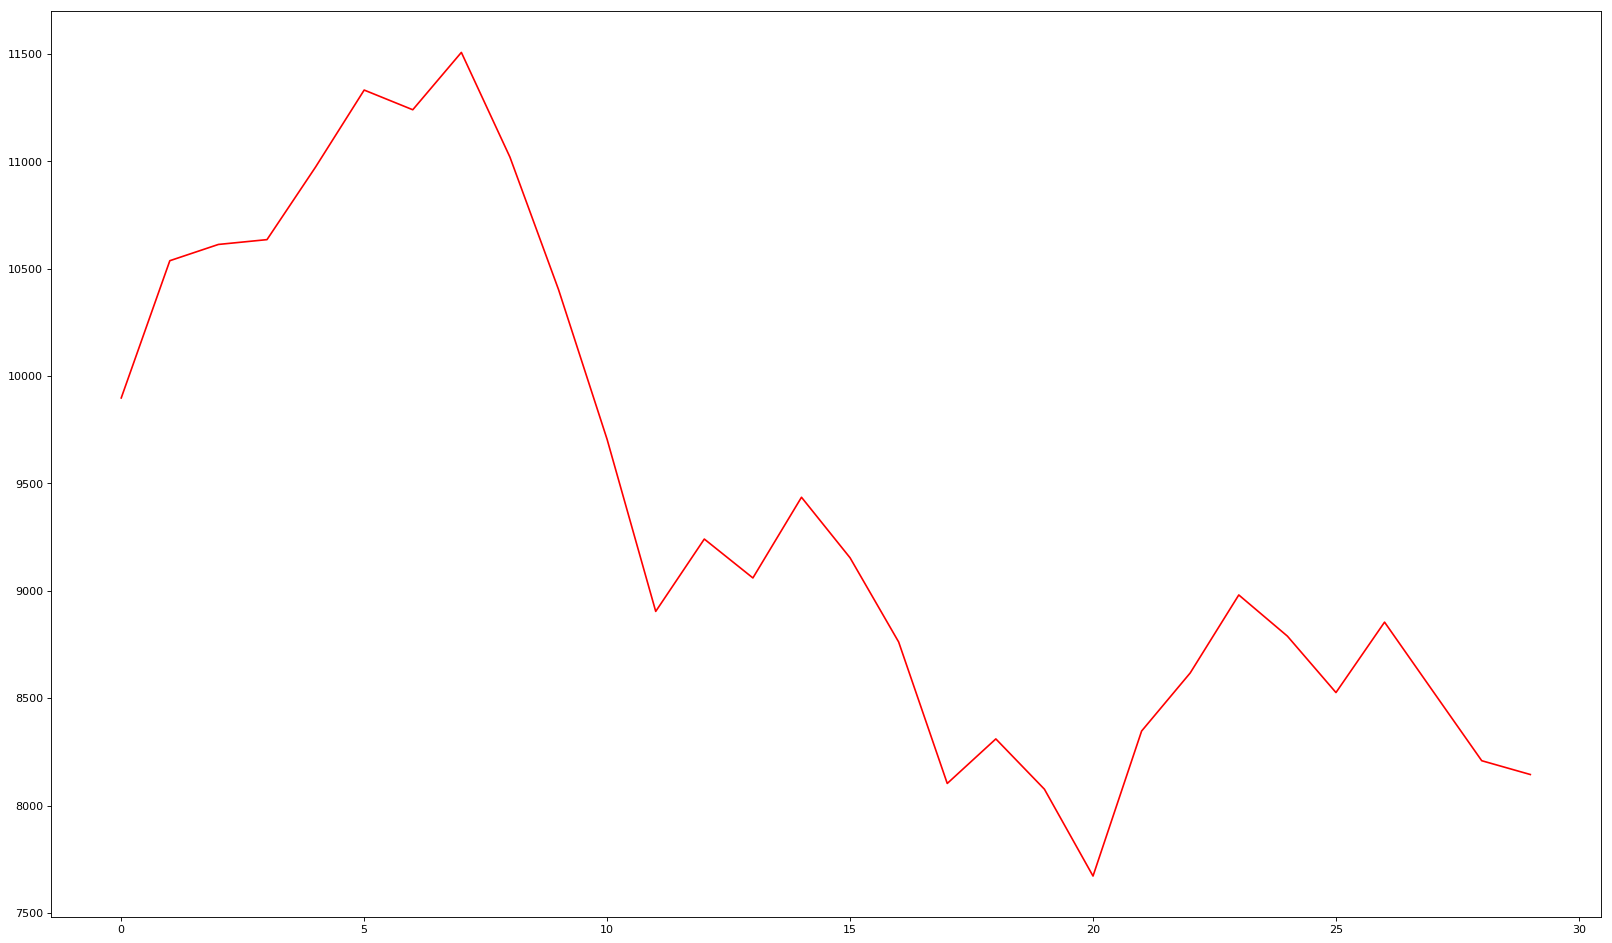

In [25]:
#visualising 
plt.figure(figsize=(25,15),dpi=80,facecolor='w',edgecolor='k')
ax=plt.gca()
plt.plot(test,color='red',label='Real BTC Price')
plt.plot(predicted_BTC_Price,color='blue',lable='Predicted BTC Price')
plt.title('BTC Price Prediction',fontsize=40)
df_test=df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()